In [1]:
#QUESTION A1
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'C:\\Users\\YASWANTH\\Desktop\\hair_loss.csv'
data = pd.read_csv(file_path)

# Select two classes: hair_fall = 1 and hair_fall = 4
class1 = data[data['hair_fall'] == 1].drop(columns=['hair_fall'])
class2 = data[data['hair_fall'] == 4].drop(columns=['hair_fall'])

# Calculate the mean (centroid) for each class
centroid1 = class1.mean(axis=0)
centroid2 = class2.mean(axis=0)

# Calculate the spread (standard deviation) for each class
spread1 = class1.std(axis=0)
spread2 = class2.std(axis=0)

# Calculate the Euclidean distance between the centroids of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)

# Print the results
print("Class 1 Centroid (hair_fall = 1):")
print(centroid1)
print("\nClass 1 Spread (Standard Deviation):")
print(spread1)

print("\nClass 2 Centroid (hair_fall = 4):")
print(centroid2)
print("\nClass 2 Spread (Standard Deviation):")
print(spread2)

print("\nInterclass Distance (Euclidean distance between centroids):")
print(interclass_distance)

Class 1 Centroid (hair_fall = 1):
total_protein         249.269820
total_keratine        249.490353
hair_texture           49.534231
vitamin               250.572399
manganese             250.616698
iron                  248.523592
calcium               250.491194
body_water_content     49.707579
stress_level           49.130252
liver_data            250.368396
dtype: float64

Class 1 Spread (Standard Deviation):
total_protein         144.362015
total_keratine        143.767749
hair_texture           28.937002
vitamin               144.157234
manganese             144.650584
iron                  144.778259
calcium               144.565448
body_water_content     28.843848
stress_level           28.813414
liver_data            144.288331
dtype: float64

Class 2 Centroid (hair_fall = 4):
total_protein         250.705776
total_keratine        247.743090
hair_texture           49.810221
vitamin               250.302328
manganese             248.278803
iron                  249.149622
calci

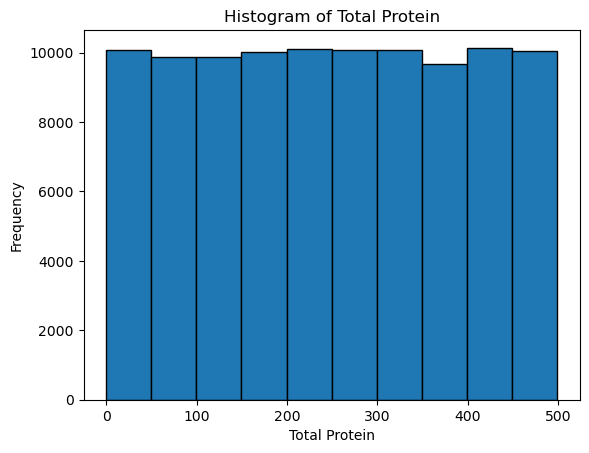

Mean of Total Protein: 249.57396
Variance of Total Protein: 20859.00720991798


In [3]:
#QUESTION A2
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\YASWANTH\\Desktop\\hair_loss.csv'
data = pd.read_csv(file_path)

# Select the feature to analyze
feature = data['total_protein']

# Calculate the histogram
hist, bin_edges = np.histogram(feature, bins=10)

# Plot the histogram
plt.hist(feature, bins=10, edgecolor='black')
plt.title('Histogram of Total Protein')
plt.xlabel('Total Protein')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance
mean = np.mean(feature)
variance = np.var(feature)

# Print the results
print(f"Mean of Total Protein: {mean}")
print(f"Variance of Total Protein: {variance}")

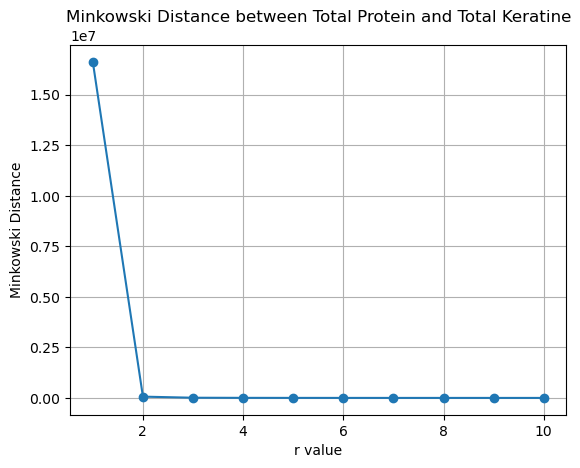

Minkowski Distance (r=1): 16614607.0
Minkowski Distance (r=2): 64436.643433686084
Minkowski Distance (r=3): 10760.201470465023
Minkowski Distance (r=4): 4514.585222029207
Minkowski Distance (r=5): 2718.27195827752
Minkowski Distance (r=6): 1954.0821426143173
Minkowski Distance (r=7): 1551.696705163983
Minkowski Distance (r=8): 1309.8880207012448
Minkowski Distance (r=9): 1151.0526126234904
Minkowski Distance (r=10): 1039.8739102837374


In [4]:
#QUESTION A3
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Load the dataset
file_path = 'C:\\Users\\YASWANTH\\Desktop\\hair_loss.csv'
data = pd.read_csv(file_path)

# Select two feature vectors
feature1 = data['total_protein'].values
feature2 = data['total_keratine'].values

# Ensure both features have the same length
if len(feature1) != len(feature2):
    raise ValueError("Feature vectors must have the same length")

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    dist = distance.minkowski(feature1, feature2, p=r)
    distances.append(dist)

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Total Protein and Total Keratine')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

# Print the results
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance (r={r}): {dist}")

In [8]:
#QUESTION A4
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'C:\\Users\\YASWANTH\\Desktop\\hair_loss.csv'
data = pd.read_csv(file_path)

# Select two classes: hair_fall = 1 and hair_fall = 4
selected_classes = data[data['hair_fall'].isin([1, 4])]

# Define X (features) and y (target)
X = selected_classes.drop(columns=['hair_fall'])
y = selected_classes['hair_fall']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the size of the train and test datasets
print(f"Size of the training dataset: {len(X_train)} samples")
print(f"Size of the testing dataset: {len(X_test)} samples")


X_train shape: (23220, 10)
X_test shape: (9952, 10)
y_train shape: (23220,)
y_test shape: (9952,)
Size of the training dataset: 23220 samples
Size of the testing dataset: 9952 samples


In [10]:
#QUESTION A5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_knn(X_train, y_train, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def predict_knn(model, X_test):
    return model.predict(X_test)

def evaluate_knn(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report

knn_model = train_knn(X_train, y_train, n_neighbors=3)

y_pred = predict_knn(knn_model, X_test)

accuracy, conf_matrix, class_report = evaluate_knn(y_test, y_pred)

print("kNN Classifier (k=3) Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

kNN Classifier (k=3) Accuracy: 0.4966840836012862

Confusion Matrix:
 [[2470 2532]
 [2477 2473]]

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.49      0.50      5002
           4       0.49      0.50      0.50      4950

    accuracy                           0.50      9952
   macro avg       0.50      0.50      0.50      9952
weighted avg       0.50      0.50      0.50      9952



In [11]:
#QUESTION A6
accuracy = knn.score(X_test, y_test)
print("Accuracy of kNN Classifier (k=3) on Test Set:", accuracy)

Accuracy of kNN Classifier (k=3) on Test Set: 0.4966840836012862


In [12]:
#QUESTION A7
print("Predicted Classes for the Test Set:")
print(y_pred)
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single prediction
predicted_class = knn.predict(test_vect)
print(f"\nPredicted Class for the given test vector {test_vect.flatten()}: {predicted_class[0]}")

Predicted Classes for the Test Set:
[1 1 4 ... 4 4 1]

Predicted Class for the given test vector [209 491  16 152 496 332  60  81  30 128]: 1


C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy with k=1: 0.4956
Accuracy with k=2: 0.5013
Accuracy with k=3: 0.4967
Accuracy with k=4: 0.5055
Accuracy with k=5: 0.5013
Accuracy with k=6: 0.4961
Accuracy with k=7: 0.5008
Accuracy with k=8: 0.4994
Accuracy with k=9: 0.5022
Accuracy with k=10: 0.5024
Accuracy with k=11: 0.5041


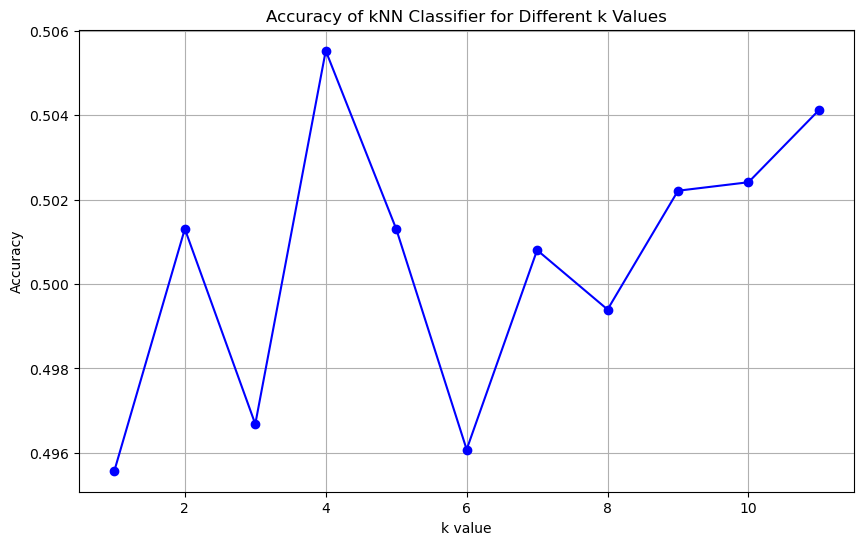

In [13]:
#QUESTION A8
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()

In [14]:
#QUESTION A9
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix for Training Data:
[[7313 4322]
 [4366 7219]]

Confusion Matrix for Test Data:
[[2474 2528]
 [2407 2543]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.63      0.63      0.63     11635
           4       0.63      0.62      0.62     11585

    accuracy                           0.63     23220
   macro avg       0.63      0.63      0.63     23220
weighted avg       0.63      0.63      0.63     23220


Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.51      0.49      0.50      5002
           4       0.50      0.51      0.51      4950

    accuracy                           0.50      9952
   macro avg       0.50      0.50      0.50      9952
weighted avg       0.50      0.50      0.50      9952

